DATA ANALYSIS ON THE ONLINE RETAIL 


In [1]:
#importing the python libraries to study the online retail file


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud,STOPWORDS

In [2]:
#reading the data by pandas library

df=pd.read_csv("/content/drive/My Drive/csv files/Online Retail.csv",encoding='ISO-8859-1')
#encoding is explicitly written in the code because file is encoded in a way that read_csv not supported

In [ ]:
#exploring the data using the libraries

#reading the first and last rows of the data in the file

print(df.head())
print(df.tail())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  01/12/10 08:26       2.55     17850.0  United Kingdom  
1  01/12/10 08:26       3.39     17850.0  United Kingdom  
2  01/12/10 08:26       2.75     17850.0  United Kingdom  
3  01/12/10 08:26       3.39     17850.0  United Kingdom  
4  01/12/10 08:26       3.39     17850.0  United Kingdom  
       InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL         

In [ ]:
#finding the number of rows and columns in the data

print(df.shape)

#finding the data types in file of each column
print(df.dtypes)

# Print summary statistics for the numeric columns
print(df.describe())


# columns of the given data 
print(df.columns)

#reading the data of each column
print(df.Country)
print(df.CustomerID)
print(df.Description)
print(df.InvoiceDate)
#to count the null values in the each column
print(df.count)
#checking for the missing data value and return the true or false

print(df.isnull())
print(df.isnull().sum()) #it will return the count of the null values in the columns

print(df.info()) #identify the missing values and data type issues and memory usage




(541909, 8)
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
541904            France
541905       

In [ ]:
#manipulating  the data using the python libraries

#selecting a subset of columns in the data by different ways

subset=df[['InvoiceNo','StockCode','InvoiceDate','Country']]
print(subset)
#selecting by the positions
print(df.iloc[:,:3])

#drop method 
print(df.drop('Country',axis=1))

#creating the new column
df['Bhargavi']=df['UnitPrice']*df['CustomerID']#multiplying the int type columns
print(df['Bhargavi'])







      InvoiceNo StockCode     InvoiceDate         Country
0        536365    85123A  01/12/10 08:26  United Kingdom
1        536365     71053  01/12/10 08:26  United Kingdom
2        536365    84406B  01/12/10 08:26  United Kingdom
3        536365    84029G  01/12/10 08:26  United Kingdom
4        536365    84029E  01/12/10 08:26  United Kingdom
...         ...       ...             ...             ...
37887    539487     22822  20/12/10 09:22  United Kingdom
37888    539487     21533  20/12/10 09:22  United Kingdom
37889    539487     21535  20/12/10 09:22  United Kingdom
37890    539487     21843  20/12/10 09:22  United Kingdom
37891    539487     20914  20/12/10 09:22              Un

[37892 rows x 4 columns]
      InvoiceNo StockCode                          Description
0        536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER
1        536365     71053                  WHITE METAL LANTERN
2        536365    84406B       CREAM CUPID HEARTS COAT HANGER
3        536365    84029G 

In [ ]:
#wrinting the data in to the new file 
df.to_csv('Bhargavi.csv',index=False)

f=pd.read_csv('Bhargavi.csv')
print(f)


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

           InvoiceDate  UnitPrice  CustomerID         Country  
0       01/

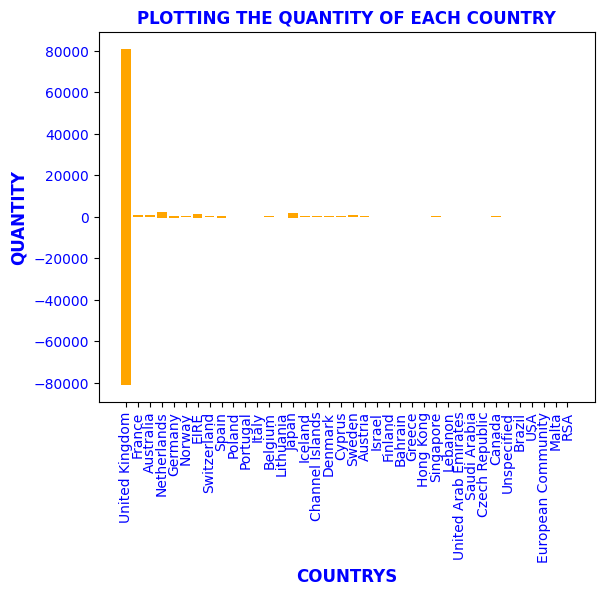

In [ ]:
#bar chat visualization to show the each country quantity of the product

plt.bar(df['Country'],df['Quantity'],color='Orange')
plt.title('PLOTTING THE QUANTITY OF EACH COUNTRY',color='blue',fontsize=12,fontweight='bold')
plt.xlabel('COUNTRYS',color='blue',fontsize=12,fontweight='bold')
plt.ylabel('QUANTITY',color='blue',fontsize=12,fontweight='bold')
plt.xticks(rotation=90)
plt.xticks(color='blue',fontsize=10)
plt.yticks(color='blue',fontsize=10)
plt.show()


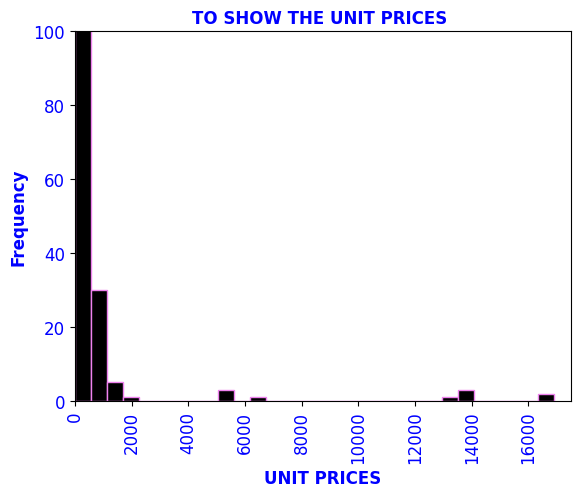

In [ ]:
#data visualizing thorough histogram to show the unit prices distribution in the data

plt.hist(df['UnitPrice'],bins=30,color='black',edgecolor='violet')
plt.title('TO SHOW THE UNIT PRICES ',color='blue',fontsize=12,fontweight='bold')
plt.ylabel('Frequency',color='blue',fontsize=12,fontweight='bold')
plt.ylim(0,100)
plt.xticks(rotation=90,color='blue',fontsize=12)
plt.xlim(0,17500)
plt.yticks(color='blue',fontsize=12)
plt.xlabel('UNIT PRICES',color='blue',fontsize=12,fontweight='bold')

plt.show()

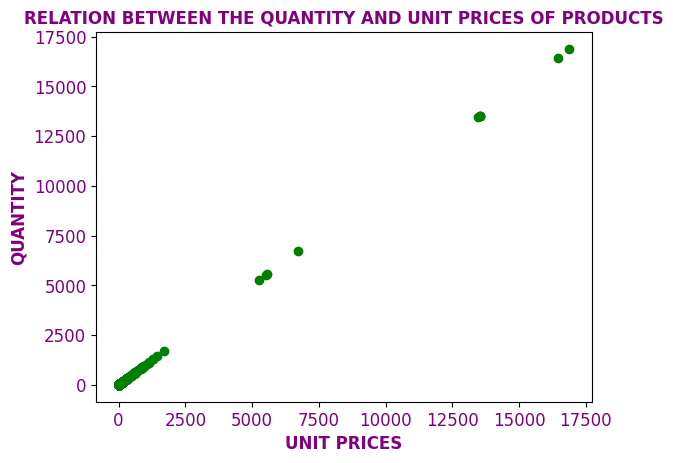

In [ ]:
#scatter plot to show the realtionshipp beetwen the quanity and the unit prices

plt.scatter(df['UnitPrice'],df['UnitPrice'],color='green')
plt.title('RELATION BETWEEN THE QUANTITY AND UNIT PRICES OF PRODUCTS',color='purple',fontsize=12,fontweight='bold')
plt.xlabel('UNIT PRICES',color='purple',fontsize=12,fontweight='bold')
plt.ylabel('QUANTITY',color='purple',fontsize=12,fontweight='bold')
plt.xticks(color='purple',fontsize=12)
plt.yticks(color='purple',fontsize=12)
plt.show()

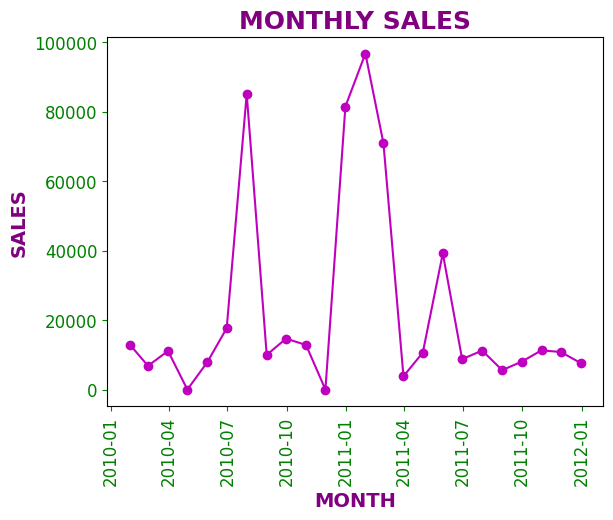

In [ ]:
#visualizing the time series of monthly sales in the online retail data

#converting the invoice cloumn into a date time form
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
#grouping the months and calculate the totalsales for each month
month_sales=df.groupby(pd.Grouper(key='InvoiceDate',freq='M'))['UnitPrice'].sum()

# Creating a figure and axis for the time series plot explicitly because of multiple figures created 
fig, ax = plt.subplots()

# Creating a time series plot with a line and marker
ax.plot(month_sales.index, month_sales.values, '-mo')

# Setting the title and labels with increased font size and weight
ax.set_title('MONTHLY SALES', fontsize=18, fontweight='bold',color='purple')
ax.set_xlabel('MONTH', fontsize=14, fontweight='bold',color='purple')
ax.set_ylabel('SALES', fontsize=14, fontweight='bold',color='purple')

# Changing  the color of the xticks and yticks
ax.tick_params(axis='x', colors='green', labelsize=12,rotation=90)
ax.tick_params(axis='y', colors='green', labelsize=12)


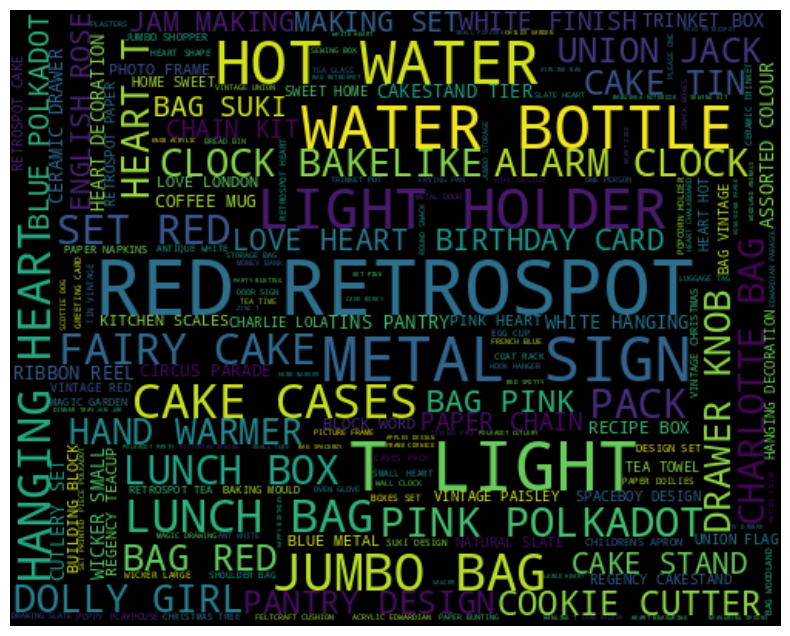

In [ ]:
# data visualzing through the word cloud

#concatinating the words into a single string
t=" ".join(str(des) for des in df.Description) # to create a long string by itering over the eacch element in the description
#creating the word cloud with parameters in the wordcloud
sw=set(STOPWORDS)#to eliminate the meaningless words in the data
w = WordCloud(
    background_color='black',
    stopwords=sw,
    width=500,
    height=400,
    max_words=200,
    max_font_size=50,
    random_state=50
).generate(t)

# Displaying  the word cloud using Matplotlib 
plt.figure(figsize=(10, 8))
plt.imshow(w , interpolation='bilinear')# imshow is a function to display the images wordcloud is a image of the most frequently used in the data

plt.axis('off')
plt.show()